In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip '/content/drive/MyDrive/New Dataset/Dataset New.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/5f6ead43-4a36-4bd6-8ee6-75f405a40e67___RS_L.Scorch 0807.JPG  
  inflating: Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/5fc91330-7005-4f57-9676-c57e653c8e12___RS_L.Scorch 1204.JPG  
  inflating: Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/612d0b91-8476-4f16-b626-8fe6de224307___RS_L.Scorch 0002_flipLR.JPG  
  inflating: Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/61b18bc0-9f48-4627-960a-1537767e1eec___RS_L.Scorch 1207.JPG  
  inflating: Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/61b18bc0-9f48-4627-960a-1537767e1e

In [ ]:
train_dir = "/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
diseases = os.listdir(train_dir)
diseases

['Potato___Hollow_Heart',
 'Squash___Powdery_mildew',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Tomato___Late_blight',
 'Strawberry___Leaf_scorch',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___Tomato_mosaic_virus',
 'Potato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Grape___Black_rot',
 'Pepper,_bell___healthy',
 'Tomato___Canker',
 'Corn_(maize)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___healthy',
 'Soybean___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Apple___Rotten',
 'Corn_(maize)___Common_rust_',
 'Tomato___Septoria_leaf_spot',
 'Grape___Esca_(Black_Measles)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tea__Black_rot',
 'Potato___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Peach___Bacterial_spot',
 'Raspberry___healthy',
 'Blueberry___healthy',
 'Tea

In [ ]:
print("Number of classes : " ,len(diseases))

Number of classes :  44


In [ ]:
nums_train = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))

In [ ]:
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
Potato___Hollow_Heart,180
Squash___Powdery_mildew,1736
Apple___Apple_scab,2016
Apple___Black_rot,1987
Tomato___Late_blight,1851
Strawberry___Leaf_scorch,1774
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Tomato___Spider_mites Two-spotted_spider_mite,1741
Tomato___Early_blight,1920


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(img_per_class_train, *['no. of images'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(img_per_class_train, *['no. of images'], **{})
chart

<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Plant'>

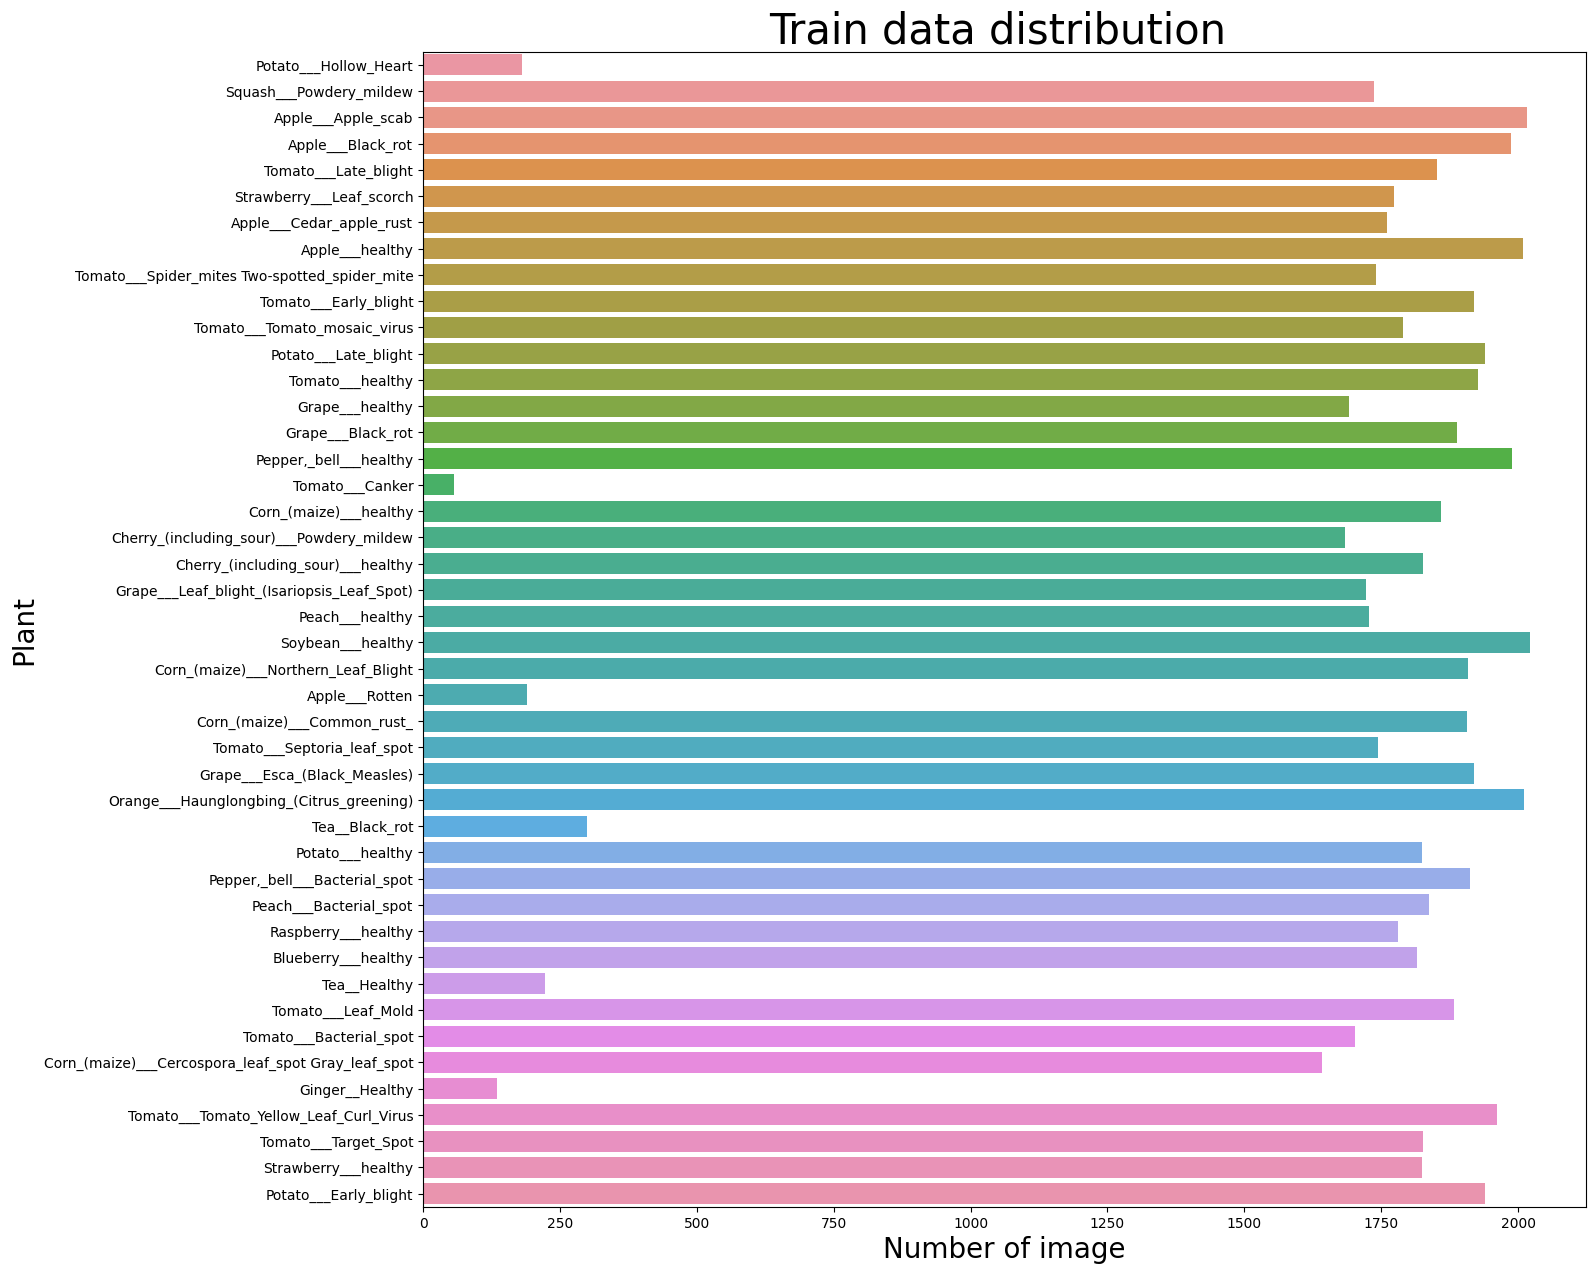

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [ ]:
import shutil

for disease in diseases:
    if len(os.listdir(train_dir + '/' + disease)) < 1500 :
      location = '/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
      final_path = os.path.join(location,disease)
      print(final_path)
      shutil.rmtree(final_path)

/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Hollow_Heart
/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Canker
/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Rotten
/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tea__Black_rot
/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tea__Healthy
/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Ginger__Healthy


In [ ]:
diseases = os.listdir(train_dir)
nums_train = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
Squash___Powdery_mildew,1736
Apple___Apple_scab,2016
Apple___Black_rot,1987
Tomato___Late_blight,1851
Strawberry___Leaf_scorch,1774
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Tomato___Spider_mites Two-spotted_spider_mite,1741
Tomato___Early_blight,1920
Tomato___Tomato_mosaic_virus,1790


<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Plant'>

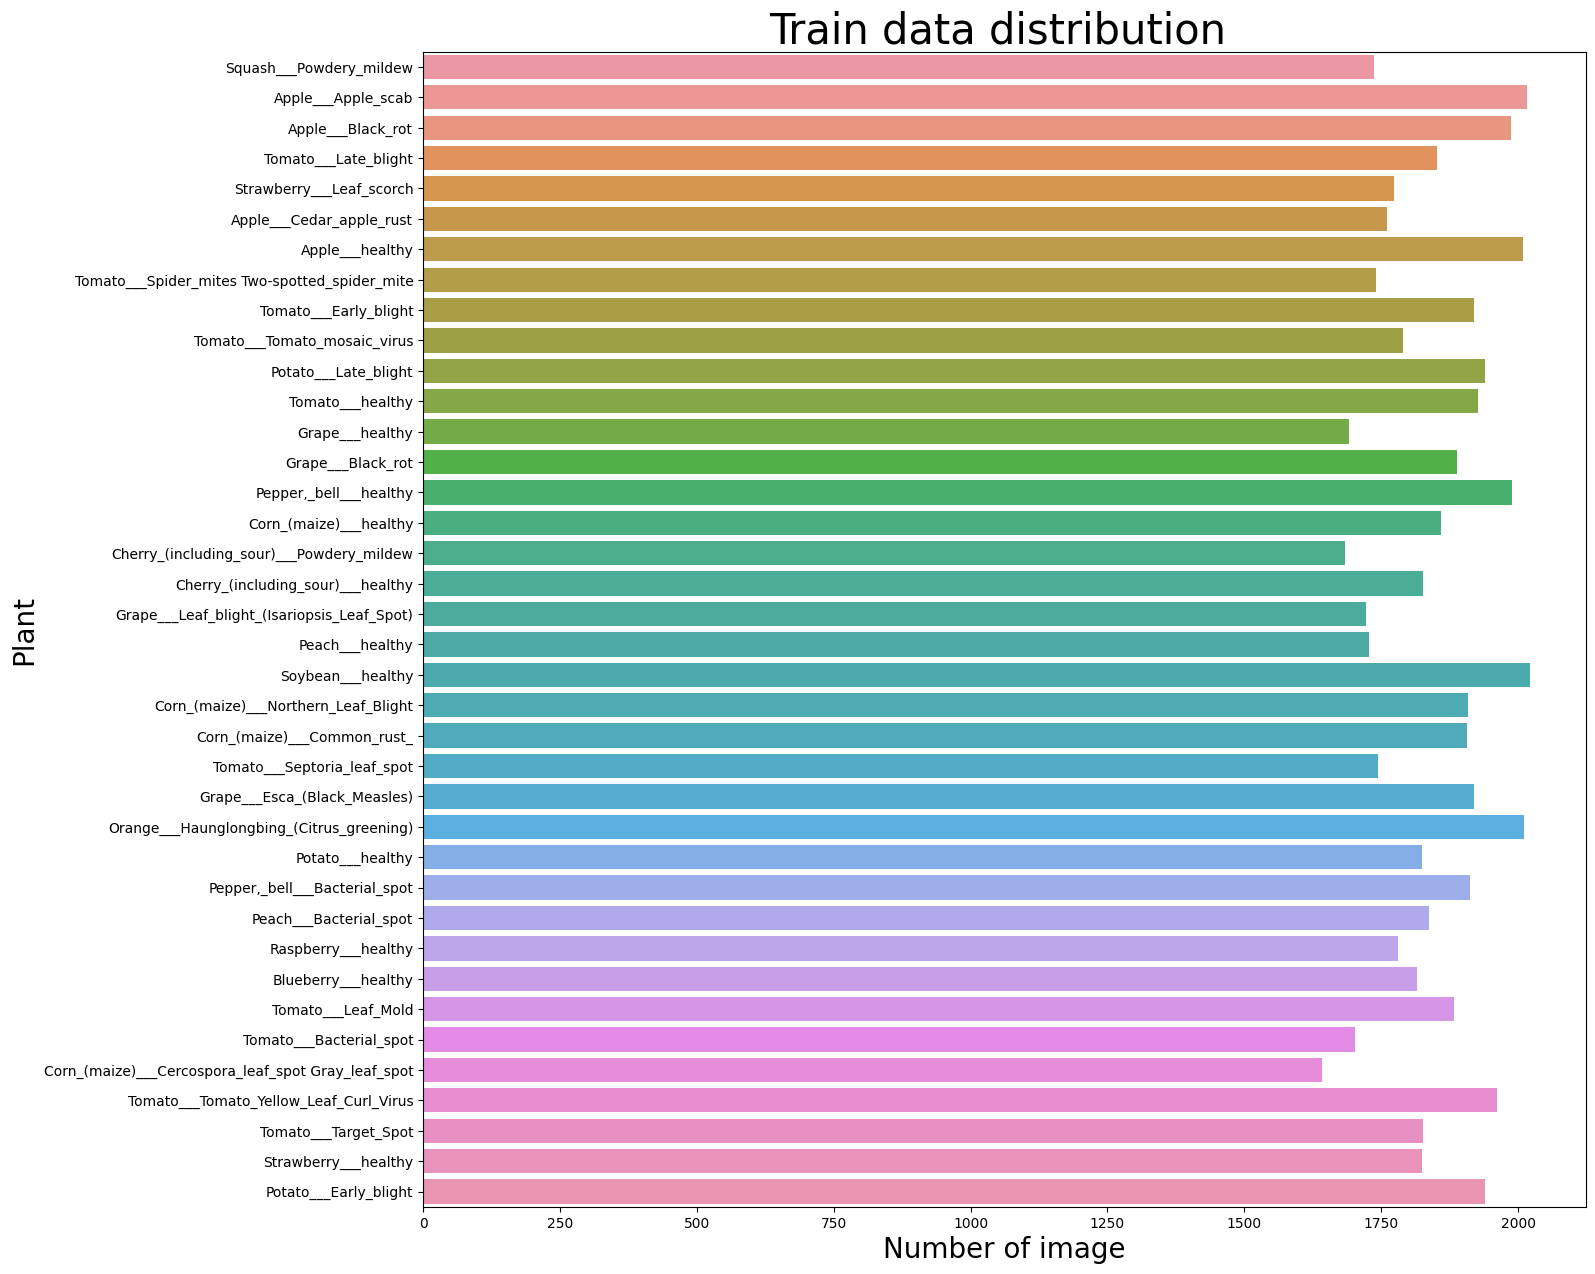

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [ ]:
# show number of images in train data
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)

The number of images for training :  70295


In [ ]:
plants=[]
diseases_unique=[]
for i in diseases:
  if(i.split('__'))[0] not in plants:
    plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])

In [ ]:
# show names and number of plants
print('Plants :',plants)
print('-'*100)
print('Number of plants : ',len(plants))

Plants : ['Squash', 'Apple', 'Tomato', 'Strawberry', 'Potato', 'Grape', 'Pepper,_bell', 'Corn_(maize)', 'Cherry_(including_sour)', 'Peach', 'Soybean', 'Orange', 'Raspberry', 'Blueberry']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [ ]:
# show names and number of unique diseases
# Names
print('diseases :',diseases_unique)
# Number of unique diseases:
print('-'*100)
print('Number of unique diseases : ',len(diseases_unique))

diseases : ['Powdery_mildew', 'Apple_scab', 'Black_rot', 'Late_blight', 'Leaf_scorch', 'Cedar_apple_rust', 'Spider_mites Two-spotted_spider_mite', 'Early_blight', 'Tomato_mosaic_virus', 'Late_blight', 'Black_rot', 'Powdery_mildew', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Northern_Leaf_Blight', 'Common_rust_', 'Septoria_leaf_spot', 'Esca_(Black_Measles)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Bacterial_spot', 'Leaf_Mold', 'Bacterial_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Target_Spot', 'Early_blight']
----------------------------------------------------------------------------------------------------
Number of unique diseases :  26


#Validation Data

In [ ]:
diseases = os.listdir(valid_dir)
diseases = os.listdir(valid_dir)
nums_val = {}
for disease in diseases:
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))

img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


,no. of images
Potato___Hollow_Heart,120
Squash___Powdery_mildew,434
Apple___Apple_scab,504
Apple___Black_rot,497
Tomato___Late_blight,463
Strawberry___Leaf_scorch,444
Apple___Cedar_apple_rust,440
Apple___healthy,502
Tomato___Spider_mites Two-spotted_spider_mite,435
Tomato___Early_blight,480


<Axes: title={'center': 'Validation data distribution '}, xlabel='Number of image', ylabel='Plant'>

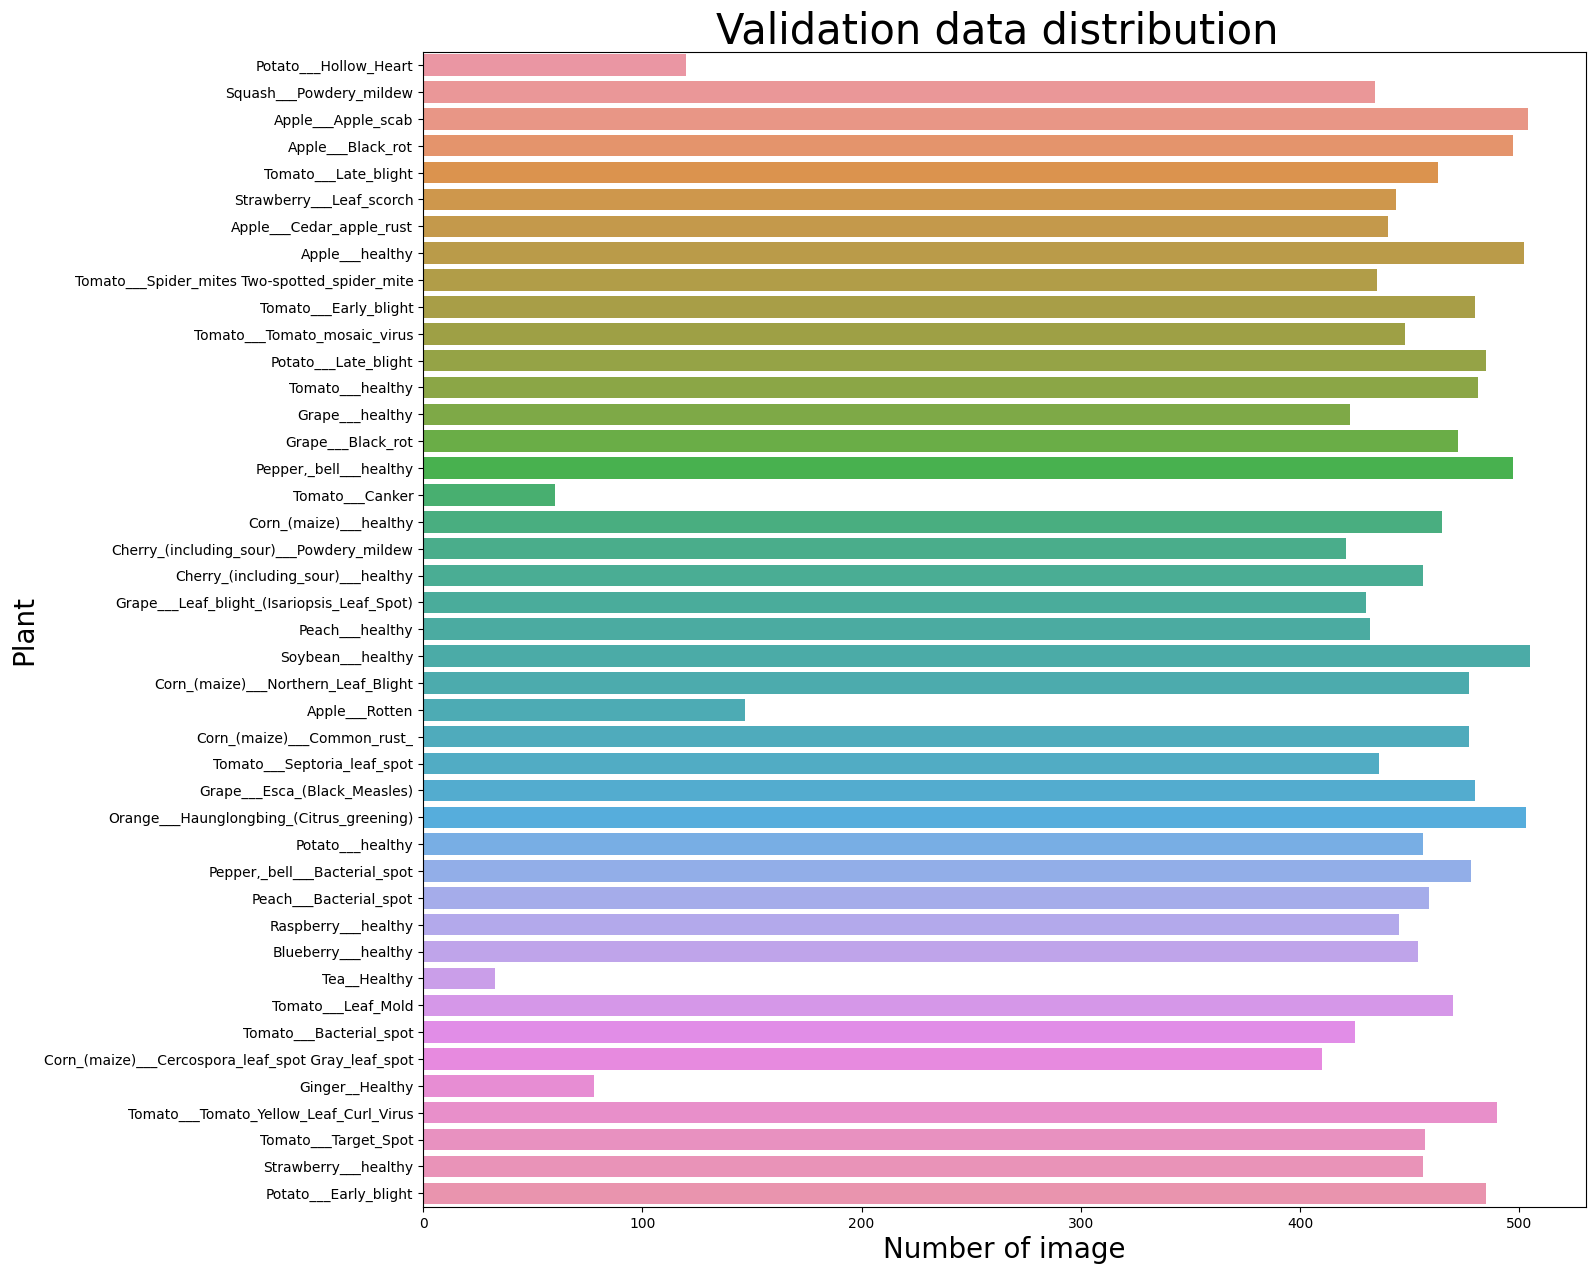

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_val.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)

In [ ]:
diseases = os.listdir(valid_dir)
for disease in diseases:
    if len(os.listdir(valid_dir + '/' + disease)) < 400 :
      location = '/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
      path = os.path.join(location,disease)
      shutil.rmtree(path)

In [ ]:
diseases = os.listdir(valid_dir)
nums_val = {}
for disease in diseases:
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))

In [ ]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


,no. of images
Squash___Powdery_mildew,434
Apple___Apple_scab,504
Apple___Black_rot,497
Tomato___Late_blight,463
Strawberry___Leaf_scorch,444
Apple___Cedar_apple_rust,440
Apple___healthy,502
Tomato___Spider_mites Two-spotted_spider_mite,435
Tomato___Early_blight,480
Tomato___Tomato_mosaic_virus,448


<Axes: title={'center': 'Validation data distribution '}, xlabel='Number of image', ylabel='Plant'>

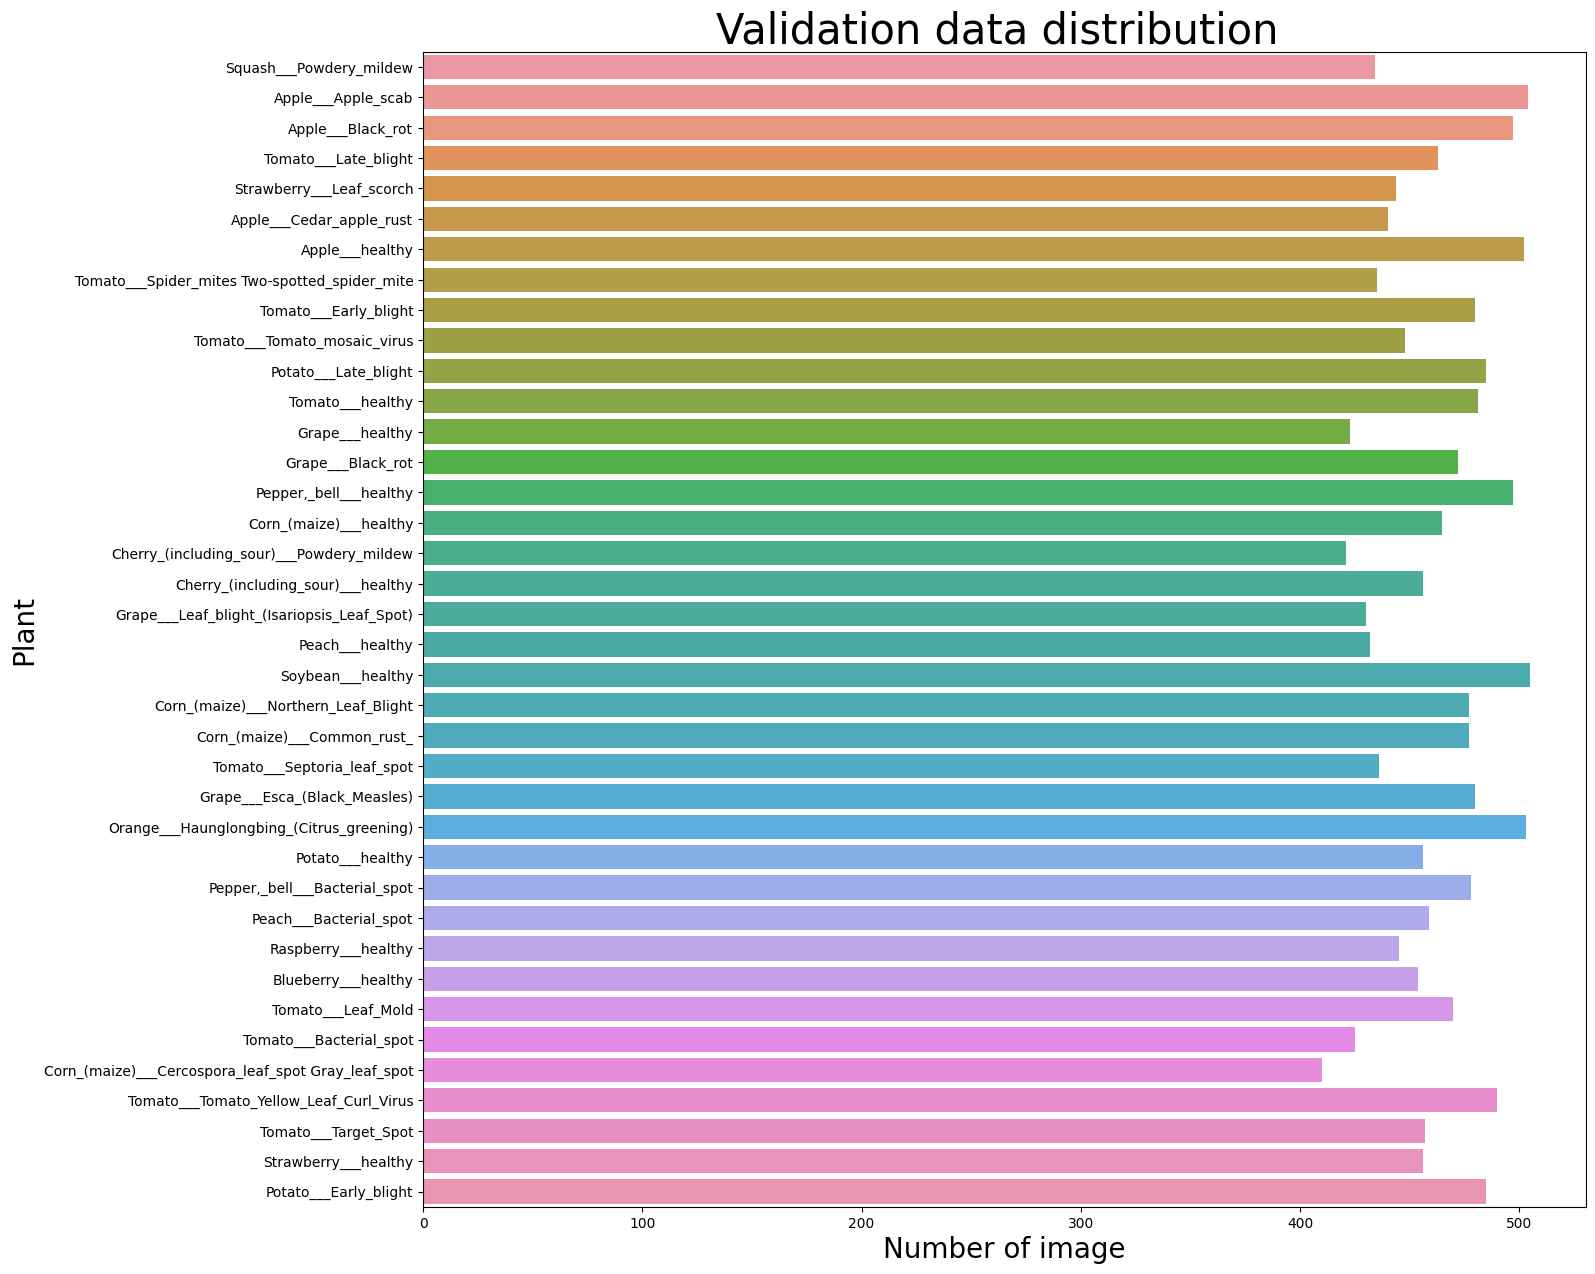

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_val.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)

In [ ]:
# show number of images in validation data
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)

The number of images for validation :  17572


#Models

In [ ]:
import tensorflow as tf
from  tensorflow import keras

In [ ]:
train_data =tf.keras.preprocessing.image_dataset_from_directory(train_dir ,
                                         image_size=(256, 256),batch_size=32,shuffle=True)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                        image_size=(256, 256),batch_size=32, shuffle=True)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
rescale = keras.layers.Rescaling(scale=1.0/255)

In [ ]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))

#Model1

In [ ]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(256, activation='relu'))
model_1.add(keras.layers.Dense(38, activation='softmax'))

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 dropout (Dropout)           (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
history = model_1.fit(train_gen,
          validation_data=valid_gen,
          epochs = 5)

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 4)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 4)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_1.predict(x),1).numpy())

In [ ]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

# Model 2

In [ ]:
model_2 = keras.Sequential()

model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model_2.add(keras.layers.Flatten())

model_2.add(keras.layers.Dense(1568,activation="relu"))
model_2.add(keras.layers.Dropout(0.5))

model_2.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [ ]:
history = model_2.fit(train_gen,
          validation_data=valid_gen,
          epochs = 5)

Epoch 1/5
2197/2197 [==============================] - 347s 158ms/step - loss: 1.4102 - accuracy: 0.5822 - val_loss: 0.5376 - val_accuracy: 0.8307
Epoch 2/5
2197/2197 [==============================] - 363s 165ms/step - loss: 0.4260 - accuracy: 0.8660 - val_loss: 0.2690 - val_accuracy: 0.9133
Epoch 3/5
2197/2197 [==============================] - 364s 166ms/step - loss: 0.2486 - accuracy: 0.9188 - val_loss: 0.1810 - val_accuracy: 0.9424
Epoch 4/5
2197/2197 [==============================] - 363s 165ms/step - loss: 0.1743 - accuracy: 0.9430 - val_loss: 0.1813 - val_accuracy: 0.9407
Epoch 5/5
2197/2197 [==============================] - 364s 166ms/step - loss: 0.1239 - accuracy: 0.9585 - val_loss: 0.1572 - val_accuracy: 0.9505


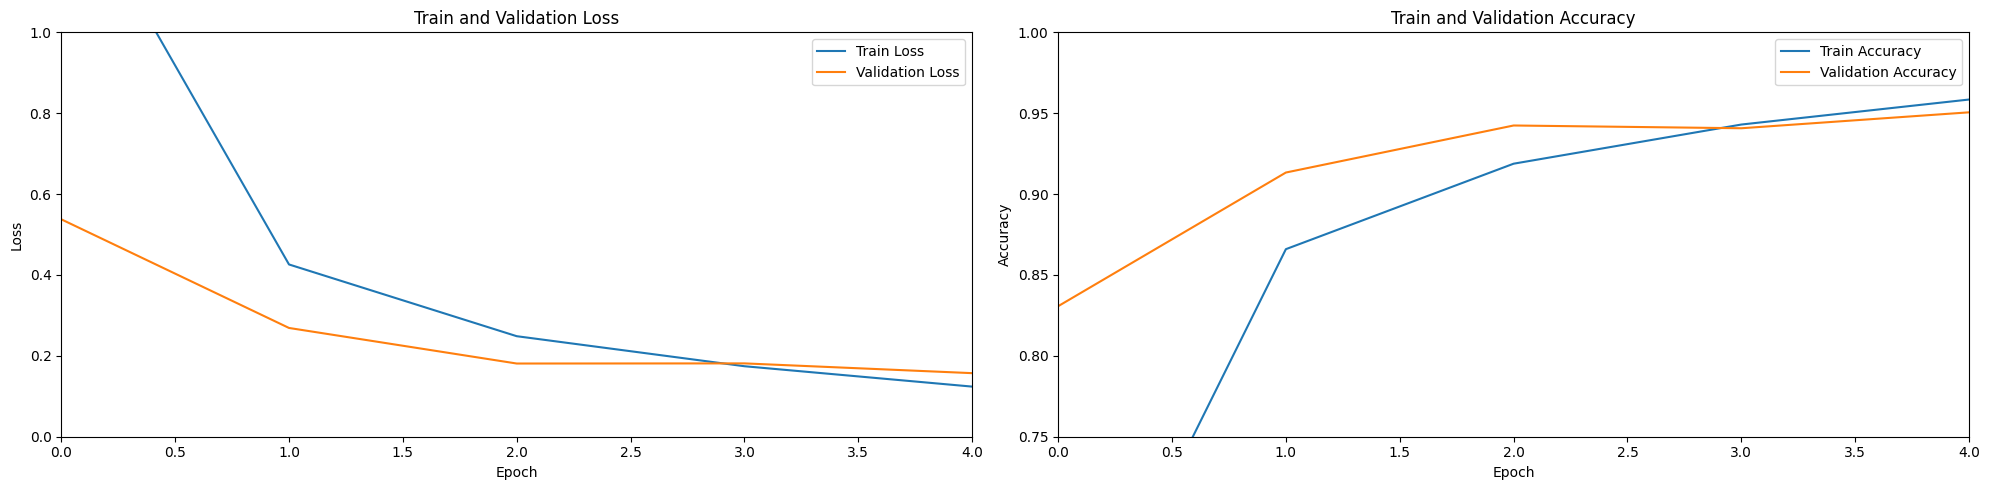

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 4)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 4)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_2.predict(x),1).numpy())

1/1 [==============================] - 0s 174ms/step


In [ ]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.85 %
Test Accuracy   : 95.05 %
Precision Score : 95.05 %
Recall Score    : 95.05 %


# Confusion Matrix

<Figure size 2000x500 with 0 Axes>

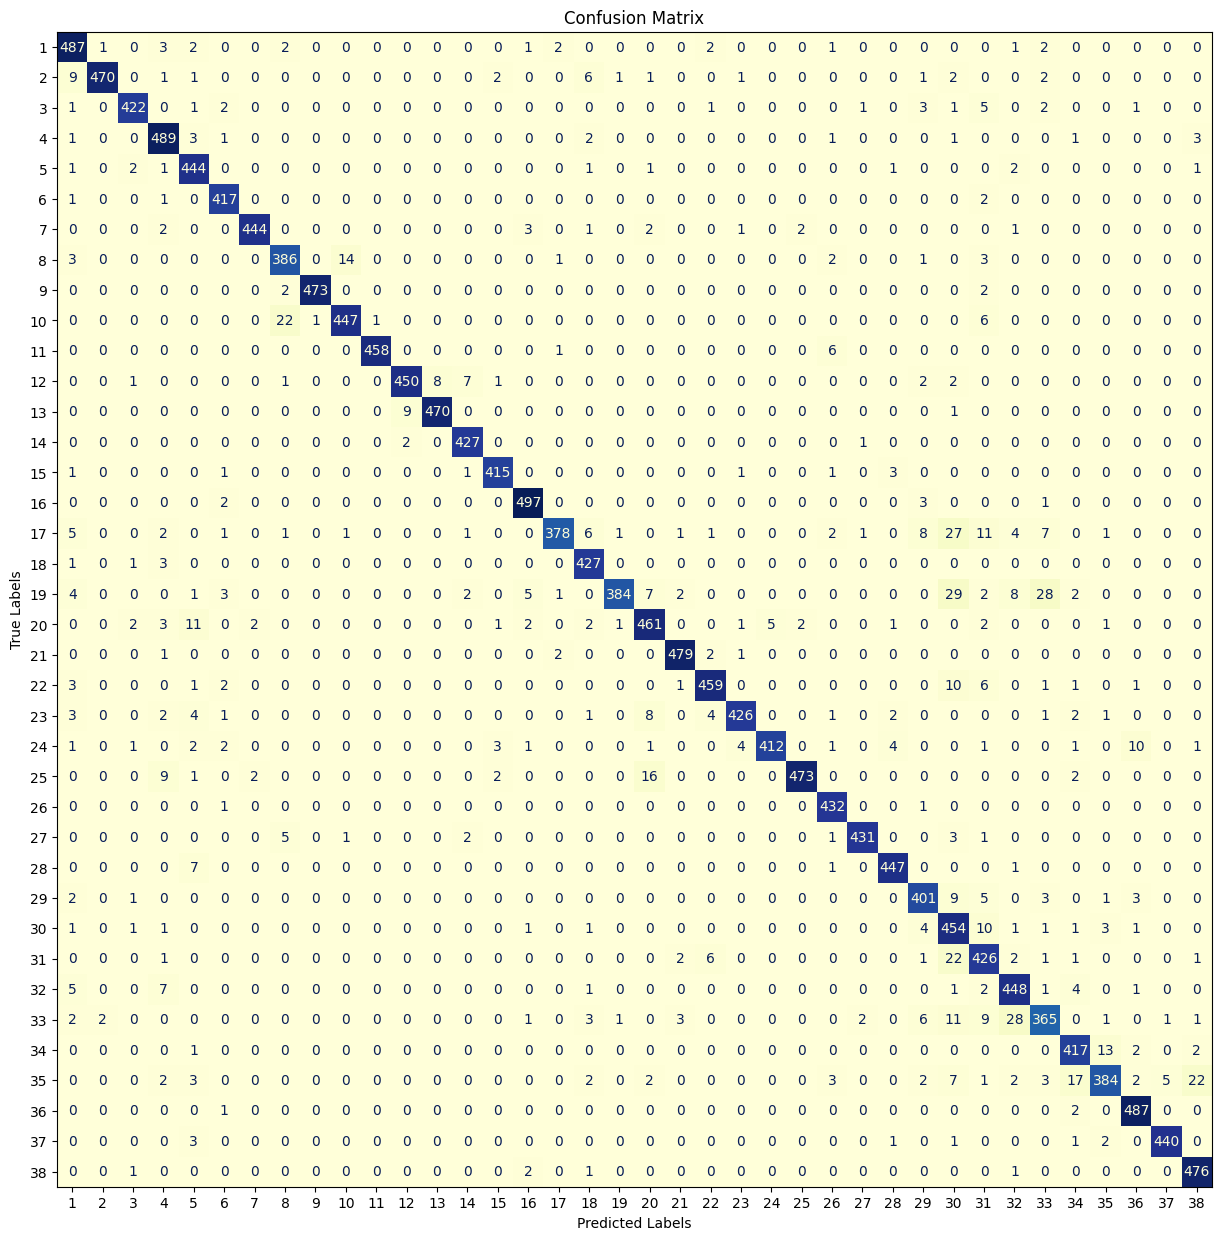

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Testing the model

In [ ]:
# predicting an image
from keras.preprocessing import image

diseases = os.listdir(train_dir)

directory="/content/Dataset New/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model_2.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = diseases[index]
    #ploting image with predicted class name
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()
    img_name = image_path.split('/')[-1][:-5]
    print("Actual class name :", img_name)

In [ ]:
image_path = files[i]
  new_img =keras.utils.load_img(image_path, target_size=(256, 256))
  img = keras.utils.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255
  prediction = model_2.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  class_name = diseases[index]
  #ploting image with predicted class name
  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  plt.axis('off')
  plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
  plt.show()
  img_name = image_path.split('/')[-1][:-5]
  print("Actual class name :", img_name)

IndentationError: ignored

#Model 3 Using VGG16

In [ ]:
train_dir = "/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/Dataset New/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_dir = "/content/Dataset New/test/test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(valid_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples
print("The Training Dataset has",train_num,"images")
print("The Validation Dataset has",valid_num,"images")

The Training Dataset has 70295 images
The Validation Dataset has 17572 images


In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model

In [ ]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 38)                953382    
                                                                 
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=2,
                         callbacks = None,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/5
549/549 [==============================] - 1061s 2s/step - loss: 0.6121 - accuracy: 0.8112 - val_loss: 0.2761 - val_accuracy: 0.9081
Epoch 2/5
549/549 [==============================] - 1051s 2s/step - loss: 0.3641 - accuracy: 0.8819 - val_loss: 0.2461 - val_accuracy: 0.9198
Epoch 3/5
549/549 [==============================] - 1042s 2s/step - loss: 0.3175 - accuracy: 0.8969 - val_loss: 0.2813 - val_accuracy: 0.9110
Epoch 4/5
549/549 [==============================] - 1027s 2s/step - loss: 0.2962 - accuracy: 0.9052 - val_loss: 0.2587 - val_accuracy: 0.9205
Epoch 5/5
549/549 [==============================] - 1017s 2s/step - loss: 0.2792 - accuracy: 0.9117 - val_loss: 0.2566 - val_accuracy: 0.9236


In [ ]:
import itertools

In [ ]:
labels2 = []
predictions2 = []
for x,y in valid_gen:
    labels2.append(list(y.numpy()))
    predictions2.append(tf.argmax(model_2.predict(x),1).numpy())

In [ ]:
predictions2 = list(itertools.chain.from_iterable(predictions2))
labels2 = list(itertools.chain.from_iterable(labels2))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history2.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels2, predictions2) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels2, predictions2, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels2, predictions2, average='micro') * 100))

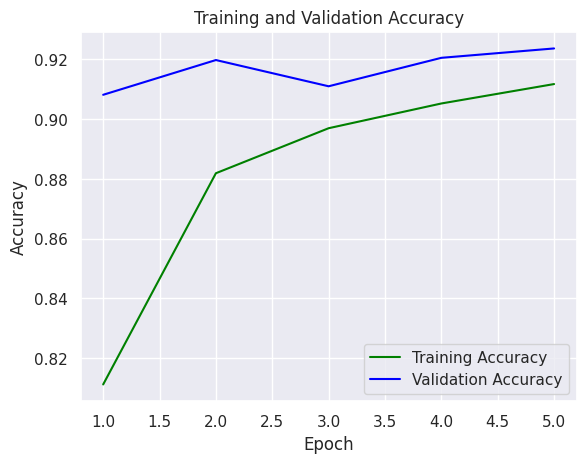

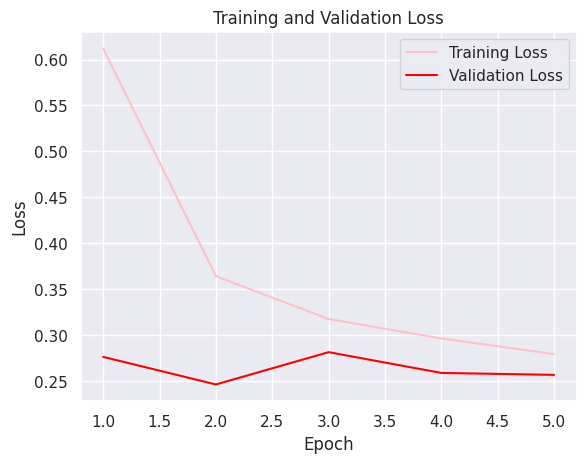

In [ ]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
classifier.save('/content/drive/MyDrive/New Dataset/model_VGG.h5')

In [ ]:
# predicting an image
import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import numpy as np

image_path = "/content/Dataset New/test/test/AppleCedarRust1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

ImportError: ignored